In [28]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [29]:
(df['win_by_runs']==0).value_counts()
#team bowling first won more than team batting first

True     316
False    261
Name: win_by_runs, dtype: int64

In [30]:
(df['result']=='normal').value_counts()

True     568
False      9
Name: result, dtype: int64

In [31]:
df.drop(["umpire3"],axis=1,inplace=True)

In [32]:
df.apply(lambda x: len(x.unique()))

id                 577
season               9
city                31
date               407
team1               13
team2               13
toss_winner         13
toss_decision        2
result               3
dl_applied           2
winner              14
win_by_runs         83
win_by_wickets      11
player_of_match    188
venue               35
umpire1             43
umpire2             45
dtype: int64

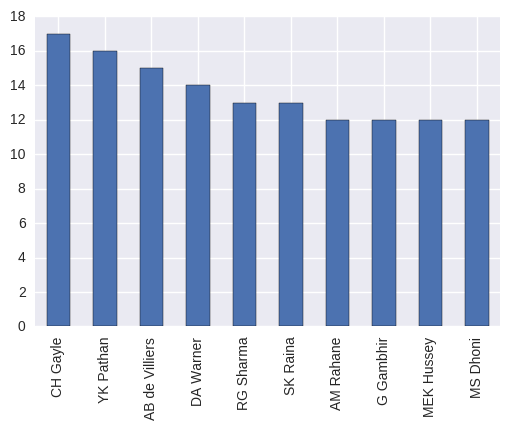

In [33]:
df["player_of_match"].value_counts()
df['player_of_match'].value_counts()[:10].plot(kind = 'bar')
#CH Gayle won maxium number of man of match awards

In [34]:
df["winner"].unique()
df["winner"] = df["winner"].fillna("tie")
df["winner"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'tie',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

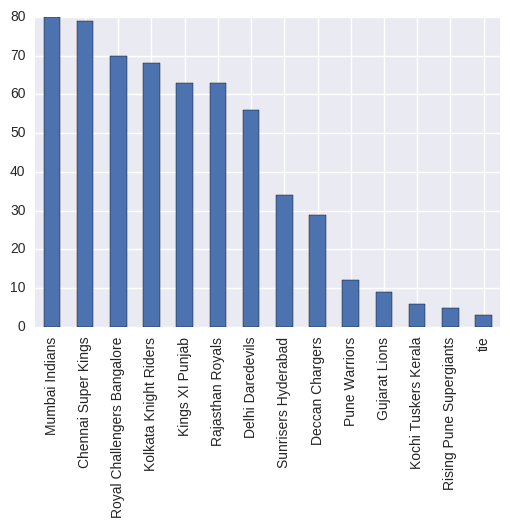

In [35]:
df["winner"].value_counts().plot(kind="bar")

In [36]:
df["toss_decision"].value_counts()

field    315
bat      262
Name: toss_decision, dtype: int64

In [37]:
df["correct_toss_decision"]=(df["toss_winner"]==df["winner"])

In [38]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,correct_toss_decision
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,False
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,True
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,False
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,False
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,False


In [39]:
df["correct_toss_decision"].value_counts()
correct =sum(df["correct_toss_decision"]==True)
percent_correct = ((correct/577)*100)
print(percent_correct)
#toss winner has marginal advantage

50.4332755633


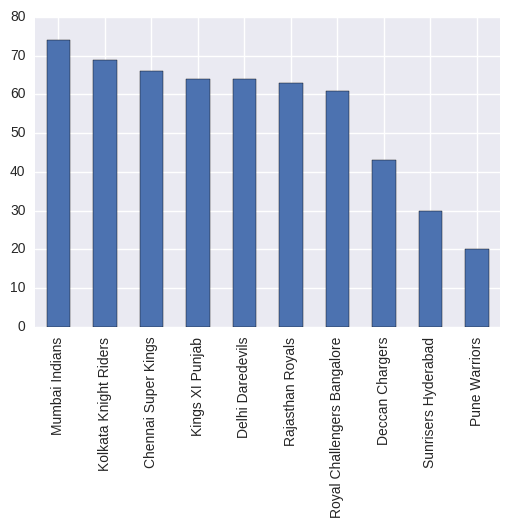

In [40]:
df["toss_winner"].value_counts()[:10].plot(kind='bar')

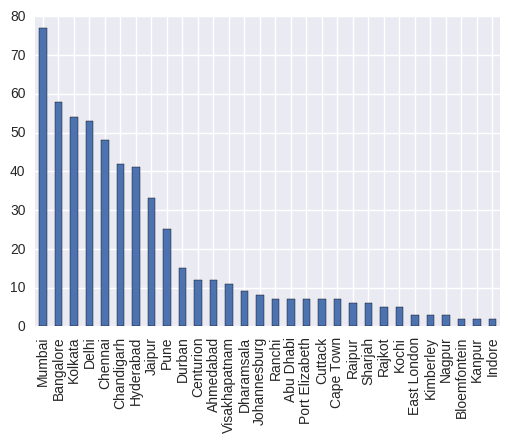

In [41]:
#most lucky team is MI
df["city"].value_counts().plot(kind="bar")

In [42]:
ball_data = pd.read_csv("deliveries.csv")
ball_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


/home/priyansh/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


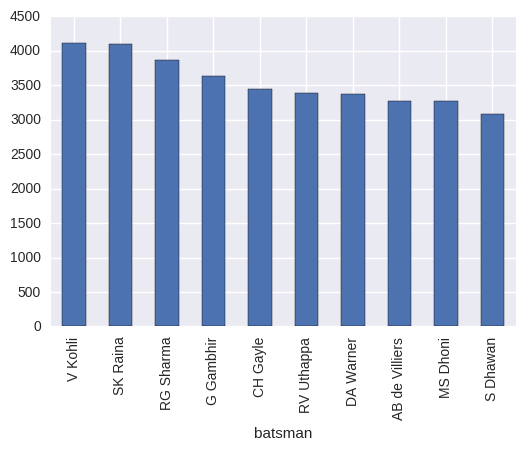

In [43]:
batsman_runs = ball_data.groupby("batsman")["batsman_runs"].sum()
batsman_runs.sort(ascending=False)
batsman_runs[:10].plot(kind="bar")

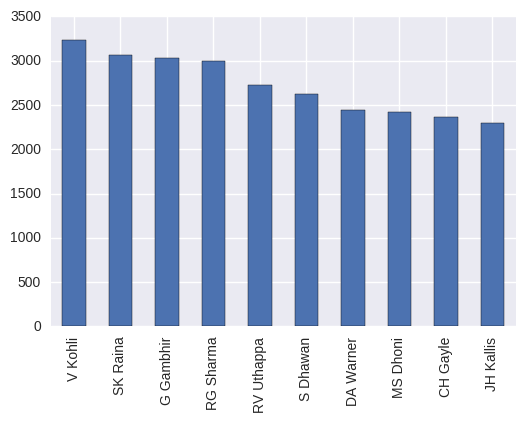

In [44]:
ball_data["batsman"].value_counts()[:10].plot(kind="bar",x="batsman_name",y="no. of deliveries faced")
# In both the lists almost all the batsman are common except JH Kallis is replced by ABD Villiers in second list

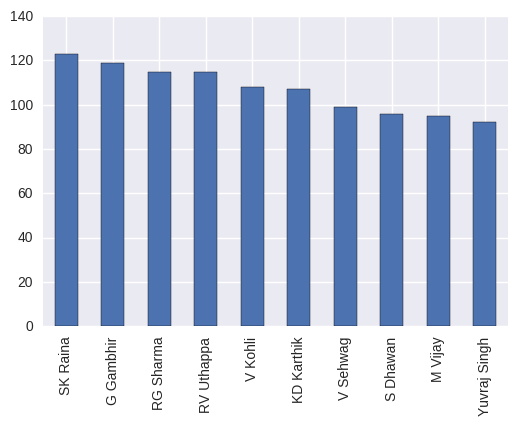

In [62]:
ball_data["over"].value_counts()
ball_data["player_dismissed"] = ball_data["player_dismissed"].fillna("0")
ball_data["player_dismissed"].value_counts()[1:11].plot(kind="bar")